### Telecom-Churn

In [6]:
df <- read.csv('Churn_telecom_dataset.csv')
df$churn <- ifelse(df$churn=='True',1,0)
library(survival)
df$survival <- Surv(df$total.day.minutes, df$churn==1)
head(df)

,state,account.length,area.code,phone.number,international.plan,voice.mail.plan,number.vmail.messages,total.day.minutes,total.day.calls,total.day.charge,total.eve.minutes,total.eve.calls,total.eve.charge,total.night.minutes,total.night.calls,total.night.charge,total.intl.minutes,total.intl.calls,total.intl.charge,customer.service.calls,churn,survival
1,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,0,265.1+
2,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0,161.6+
3,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,0,243.4+
4,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,299.4+
5,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,166.7+
6,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.7,0,0,223.4+


##### Fit a cox proportional hazards model

Call:
coxph(formula = s ~ total.day.charge + customer.service.calls, 
    data = df[, -4])

  n= 3333, number of events= 483 

                          coef exp(coef) se(coef)     z Pr(>|z|)    
total.day.charge       0.05373   1.05520  0.00502 10.70   <2e-16 ***
customer.service.calls 0.31043   1.36401  0.02726 11.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                       exp(coef) exp(-coef) lower .95 upper .95
total.day.charge           1.055     0.9477     1.045     1.066
customer.service.calls     1.364     0.7331     1.293     1.439

Concordance= 0.702  (se = 0.015 )
Rsquare= 0.066   (max possible= 0.872 )
Likelihood ratio test= 228.2  on 2 df,   p=0
Wald test            = 244.6  on 2 df,   p=0
Score (logrank) test = 246.6  on 2 df,   p=0


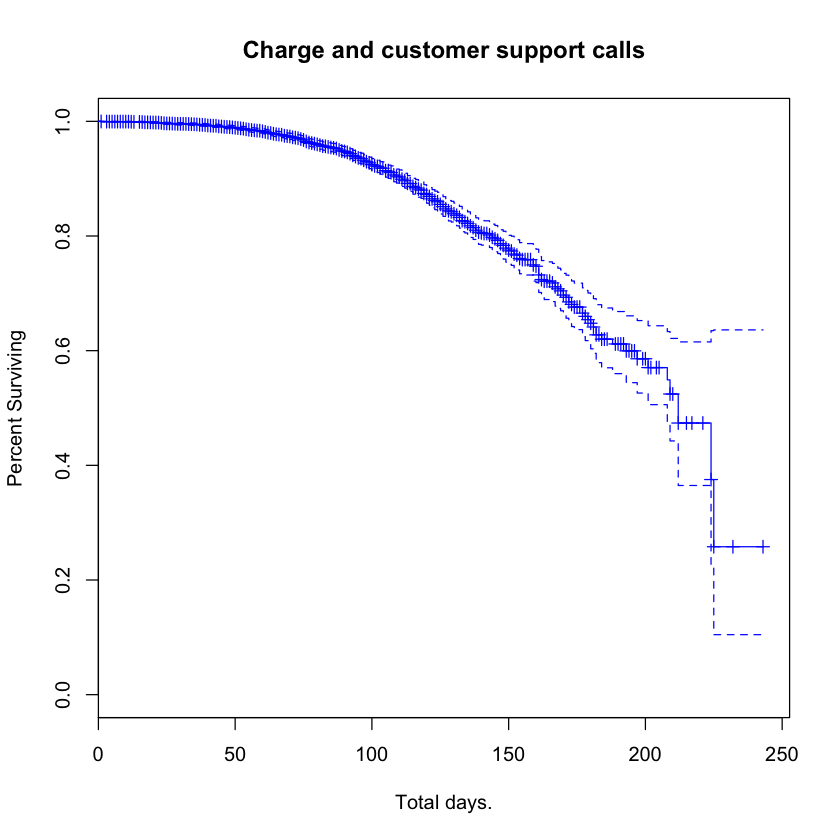

In [2]:
s <- with(df, Surv(account.length,churn))
model <- coxph(s ~ total.day.charge + customer.service.calls, data=df[, -4])
summary(model)
plot(survfit(model), col='blue', xlab = 'Total days.', ylab = 'Percent Surviving')
title(main = 'Charge and customer support calls')

#### -----------------------------------------------------------------------------------------------------------------------------------------------
### Line in the middle represents the best estimate of the percent of customers surviving at each time interval. In respect to day charge

Call:
coxph(formula = s ~ total.day.charge + strata(customer.service.calls <= 
    3), data = df[, -4])

  n= 3333, number of events= 483 

                     coef exp(coef) se(coef)     z Pr(>|z|)    
total.day.charge 0.054980  1.056520 0.004991 11.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 exp(coef) exp(-coef) lower .95 upper .95
total.day.charge     1.057     0.9465     1.046     1.067

Concordance= 0.715  (se = 0.018 )
Rsquare= 0.036   (max possible= 0.839 )
Likelihood ratio test= 121.8  on 1 df,   p=0
Wald test            = 121.4  on 1 df,   p=0
Score (logrank) test = 121.1  on 1 df,   p=0


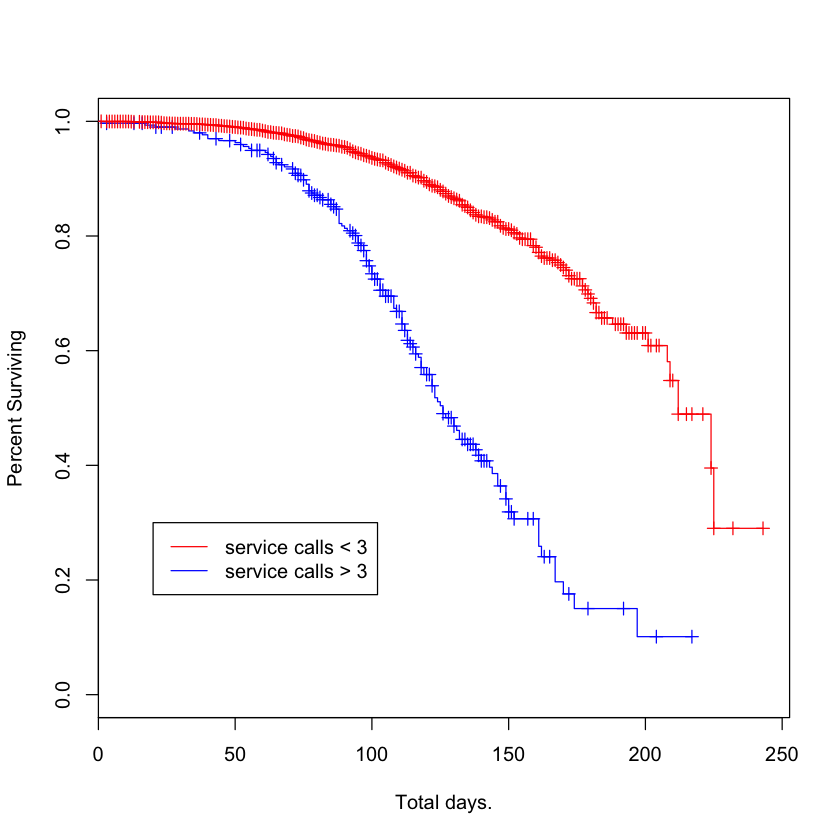

In [5]:
model <- coxph(s ~ total.day.charge + strata(customer.service.calls <= 3), data=df[, -4])
summary(model)
plot(survfit(model), col=c("blue", "red"),xlab = 'Total days.', ylab = 'Percent Surviving')
legend(20, .3, legend = c('service calls < 3', 'service calls > 3'), col = c('red', 'blue'), lty = c(1, 1))

#### ------------------------------------------------------------------------------------------------------------------
### Number or customers surviving in respect to the service calls. 